# Machine Learning - Assignment2

[Link to drive](https://drive.google.com/drive/folders/13szPDg6gkZOw87z8JEWtMa4AumZFWYVH?usp=sharing)

## Import Libraries

In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.model_selection import train_test_split

## Question 1

### Download Data

In [142]:
file_id = '117LO2wPC6D-Dr2LfkIVZfZDWrVMoEIGR'
url = f'https://drive.google.com/uc?id={file_id}'

df = pd.read_csv(url)

In [143]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


### Feature Engineering

In [144]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [145]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [146]:
print(df.isnull().sum())

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


In [147]:
df.drop_duplicates(inplace=True)

In [148]:
categorical_columns = ['sex', 'smoker', 'region']
encoder = OneHotEncoder(handle_unknown='ignore')
encoded = encoder.fit_transform(df[categorical_columns]).toarray()
encoded_df = pd.DataFrame(encoded, columns=encoder.get_feature_names_out(categorical_columns))
new_df = pd.concat([df, encoded_df], axis=1)
new_df.drop(categorical_columns, axis=1, inplace=True)

In [149]:
new_df

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19.0,27.900,0.0,16884.92400,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,18.0,33.770,1.0,1725.55230,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
2,28.0,33.000,3.0,4449.46200,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
3,33.0,22.705,0.0,21984.47061,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
4,32.0,28.880,0.0,3866.85520,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1334,18.0,31.920,0.0,2205.98080,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1335,18.0,36.850,0.0,1629.83350,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1336,21.0,25.800,0.0,2007.94500,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1337,61.0,29.070,0.0,29141.36030,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [150]:
new_df.isnull().sum()

age                 1
bmi                 1
children            1
charges             1
sex_female          1
sex_male            1
smoker_no           1
smoker_yes          1
region_northeast    1
region_northwest    1
region_southeast    1
region_southwest    1
dtype: int64

In [151]:
new_df.dropna(inplace=True)

In [152]:
new_df.isnull().sum()

age                 0
bmi                 0
children            0
charges             0
sex_female          0
sex_male            0
smoker_no           0
smoker_yes          0
region_northeast    0
region_northwest    0
region_southeast    0
region_southwest    0
dtype: int64

### Linear Regression Before Normalization

In [153]:
features = new_df.drop(['charges'], axis=1)
target = new_df['charges']

# Split the data into training and testing sets. 70% training, 30% testing
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)

In [154]:
model = LinearRegression().fit(x_train, y_train)
model.score(x_train, y_train)

0.22999272098020374

## plot

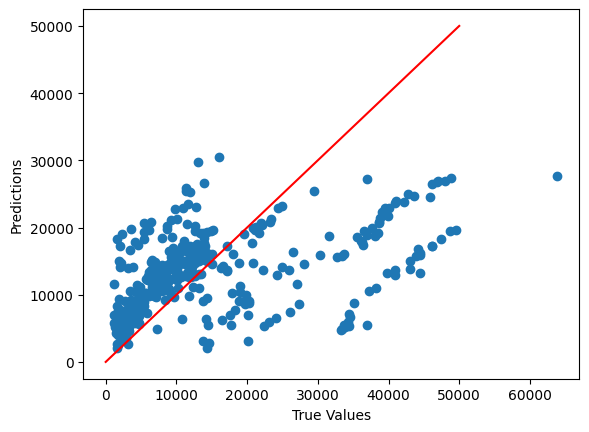

In [155]:
plt.scatter(y_test, model.predict(x_test))
plt.plot([0, 50000], [0, 50000], color='red')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.show()

In [156]:
y_pred = model.predict(x_test)

In [157]:
# Calculate MAE
mae = metrics.mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error (MAE): {mae}')

# Calculate MSE
mse = metrics.mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error (MSE): {mse}')

# Calculate RMSE
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error (RMSE): {rmse}')

Mean Absolute Error (MAE): 8099.802384675712
Mean Squared Error (MSE): 123265931.8460503
Root Mean Squared Error (RMSE): 11102.519166659895


### Normalization

In [158]:
numeric_columns = ['age', 'bmi', 'charges']
scaler = StandardScaler()
new_df[numeric_columns] = scaler.fit_transform(new_df[numeric_columns])

In [159]:
new_df

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,-1.440016,-0.453197,0.0,0.298918,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,-1.511283,0.509049,1.0,-0.953656,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
2,-0.798610,0.382826,3.0,-0.728588,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
3,-0.442273,-1.304793,0.0,0.720278,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
4,-0.513541,-0.292550,0.0,-0.776727,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1332,0.911805,2.300760,3.0,-0.153320,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
1333,0.769271,0.050056,3.0,-0.220342,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1334,-1.511283,0.205785,0.0,-0.913960,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1335,-1.511283,1.013941,0.0,-0.961565,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


### Linear Regression After Normalization

In [160]:
features = new_df.drop(['charges'], axis=1)
target = new_df['charges']
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)

In [161]:
model = LinearRegression().fit(x_train, y_train)
model.score(x_train, y_train)

0.22999272098020374

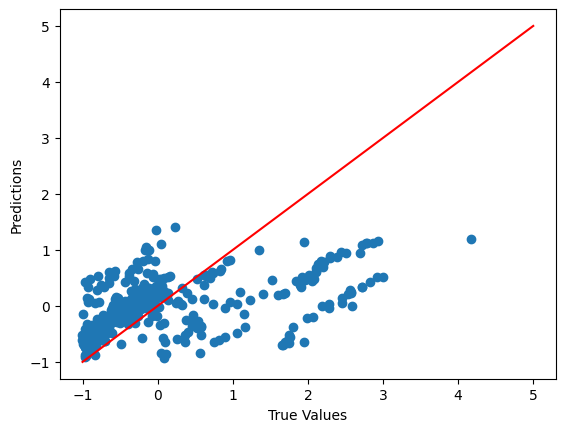

In [167]:
plt.scatter(y_test, model.predict(x_test))
plt.plot([-1, 5], [-1, 5], color='red')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.show()

In [163]:
y_pred = model.predict(x_test)

In [164]:
# Calculate MAE
mae = metrics.mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error (MAE): {mae}')

# Calculate MSE
mse = metrics.mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error (MSE): {mse}')

# Calculate RMSE
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error (RMSE): {rmse}')

Mean Absolute Error (MAE): 0.6692626909308923
Mean Squared Error (MSE): 0.8415645773734196
Root Mean Squared Error (RMSE): 0.9173682888422837
